In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc

In [3]:
diabetes = load_diabetes()

In [4]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
df["target"] = diabetes.target
df["target"].head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [6]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


(None,
         age       sex       bmi        bp        s1        s2        s3  \
 0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 
          s4        s5        s6  target  
 0 -0.002592  0.019907 -0.017646   151.0  
 1 -0.039493 -0.068332 -0.092204    75.0  
 2 -0.002592  0.002861 -0.025930   141.0  
 3  0.034309  0.022688 -0.009362   206.0  
 4 -0.002592 -0.031988 -0.046641   135.0  )

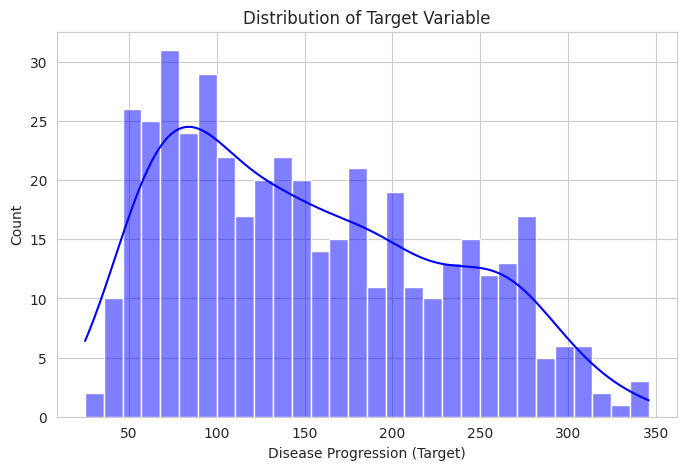

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df["target"], bins=30, kde=True, color="blue")
plt.xlabel("Disease Progression (Target)")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()

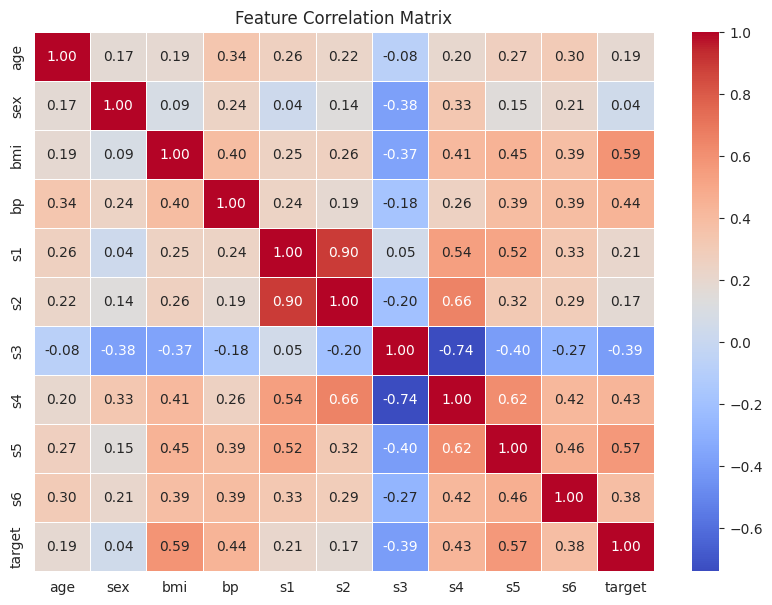

In [8]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [9]:
X = df[['bmi','age','sex','bp','s1','s2','s3','s4','s5','s6']]
y = df["target"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

In [71]:
median_target = np.median(y_train)
y_train_binary = (y_train >= median_target).astype(int)
y_test_binary = (y_test >= median_target).astype(int)

In [72]:
y_pred_prob = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [75]:
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

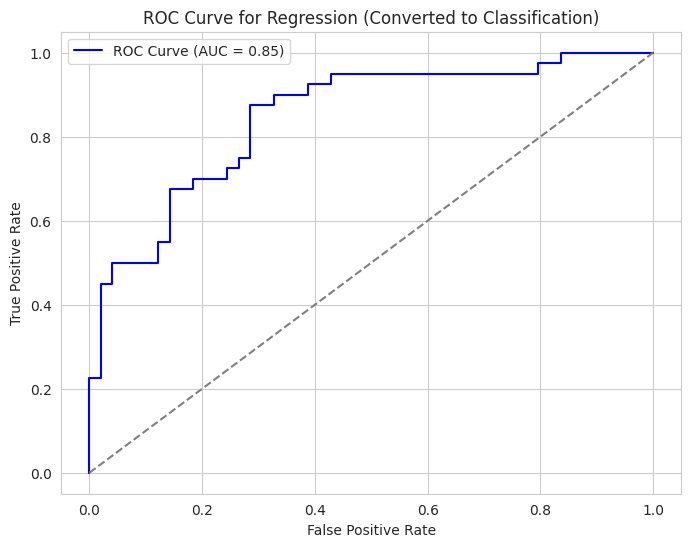

In [76]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Regression (Converted to Classification)")
plt.legend()
plt.show()

In [13]:
print(model.coef_)
print(model.intercept_)

[ 542.42875852   37.90402135 -241.96436231  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
151.34560453985995


In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

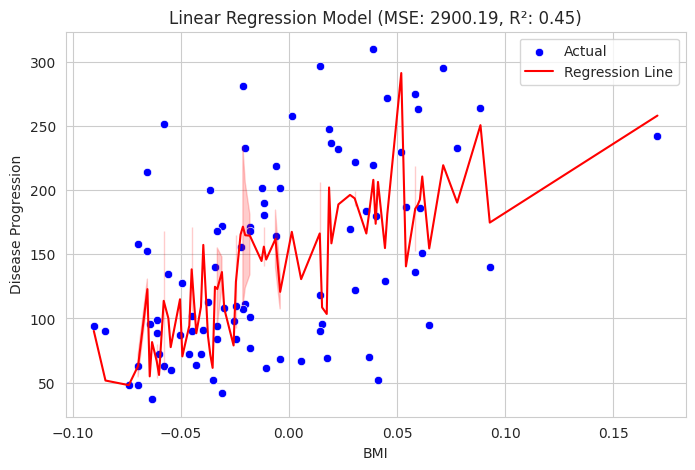

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['bmi'], y=y_test, color="blue", label="Actual")
sns.lineplot(x=X_test['bmi'], y=y_pred, color="red", label="Regression Line")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title(f"Linear Regression Model (MSE: {mse:.2f}, R²: {r2:.2f})")
plt.legend()
plt.show()

In [17]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 2900.19
R² Score: 0.45


In [18]:
import numpy as np

mse_loss = np.mean((y_test - y_pred) ** 2)

print(f"Loss Function (MSE): {mse_loss:.2f}")


Loss Function (MSE): 2900.19


In [19]:
mae_loss = np.mean(np.abs(y_test - y_pred))
print(f"Loss Function (MAE): {mae_loss:.2f}")


Loss Function (MAE): 42.79


In [29]:
import numpy as np

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

In [30]:
m = 0
b = 0
learning_rate = 0.1
epochs = 1000
n = len(X_train_np)

In [31]:
loss_history = []

In [33]:
for epoch in range(epochs):
    # Calculate predictions for all training samples
    y_pred = m * X_train_np + b  # Use X_train_np directly

    # Calculate the error (no need to reshape y_train_np)
    error = y_pred - y_train_np[:, np.newaxis]  # Add a new axis to y_train_np to make it a column vector

    # Update m and b using gradient descent (no need to reshape X_train_np)
    dm = (-2 / n) * np.sum(X_train_np * error, axis=0)  # Sum over training samples (axis=0)
    db = (-2 / n) * np.sum(error)

    m -= learning_rate * dm
    b -= learning_rate * db

    # Calculate MSE
    mse = np.mean(error**2)
    loss_history.append(mse)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: MSE = {mse:.2f}")

Epoch 0: MSE = 29711.32
Epoch 100: MSE = 6277891793019216495825358203834367517779382643708284228494751816875126146131113130186339864241242112.00
Epoch 200: MSE = 1667526234145411318309704041170127218586679340446959362680227549991752833749430683682622502738653489127388684104372926706501291969172280712057933877370285895995312985775419238587628757481420750848.00
Epoch 300: MSE = 442926357006528139907449932220619402749277531726166384975562799423927607915558184385766118717987477501872592910273294634814194944874181388734734108039956265035452328441378632639971309475638146459781178210129910611650353390580159981058273913567706927829244820862626965103633678064353317748736.00
Epoch 400: MSE = inf
Epoch 500: MSE = inf
Epoch 600: MSE = inf
Epoch 700: MSE = nan
Epoch 800: MSE = nan
Epoch 900: MSE = nan


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-33-91dced667f5d>:16: RuntimeWarning: overflow encountered in square
  mse = np.mean(error**2)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


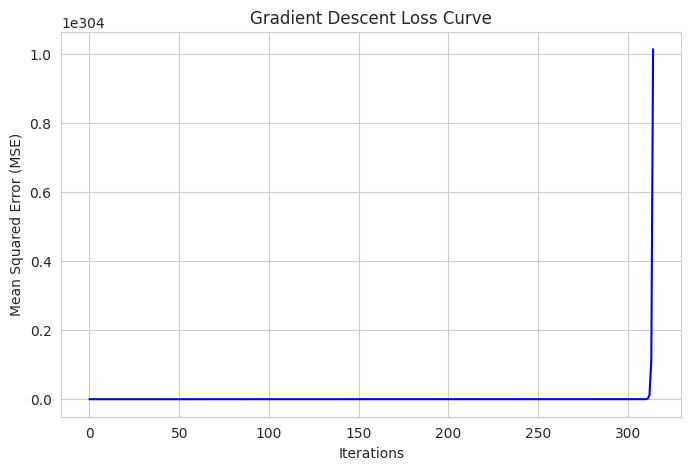

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), loss_history, color="blue")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Gradient Descent Loss Curve")
plt.show()

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [54]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target

In [55]:
X = df[['bmi', 'age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
y = df["target"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [59]:
lasso = Lasso(max_iter=5000)
grid_search = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=5000),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [60]:
alphas = lasso_params['alpha']
mse_scores = -grid_search.cv_results_['mean_test_score']

In [62]:
best_alpha = grid_search.best_params_['alpha']
best_mse = -grid_search.best_score_

In [63]:
print(f"Best alpha (Lasso): {best_alpha}")
print(f"Best MSE (Lasso): {best_mse}")

Best alpha (Lasso): 1
Best MSE (Lasso): 3130.8423536442724


In [64]:
lasso_best = Lasso(alpha=best_alpha, max_iter=5000)
lasso_best.fit(X_train, y_train)

Lasso(alpha=1, max_iter=5000)

In [65]:
y_pred = lasso_best.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE (Lasso with best alpha): {test_mse}")

Test MSE (Lasso with best alpha): 2824.563757674886


In [66]:
feature_importance = pd.Series(lasso_best.coef_, index=X.columns)

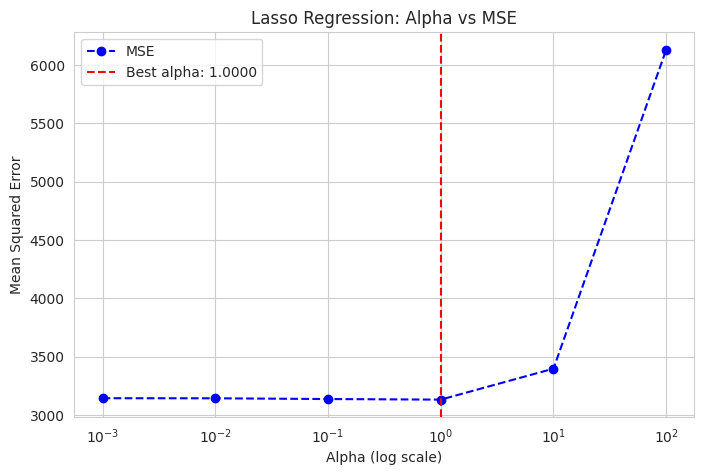

In [67]:
plt.figure(figsize=(8, 5))
plt.plot(alphas, mse_scores, marker='o', linestyle='--', color='b', label='MSE')
plt.axvline(best_alpha, color='r', linestyle='--', label=f'Best alpha: {best_alpha:.4f}')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean Squared Error")
plt.title("Lasso Regression: Alpha vs MSE")
plt.legend()
plt.show()

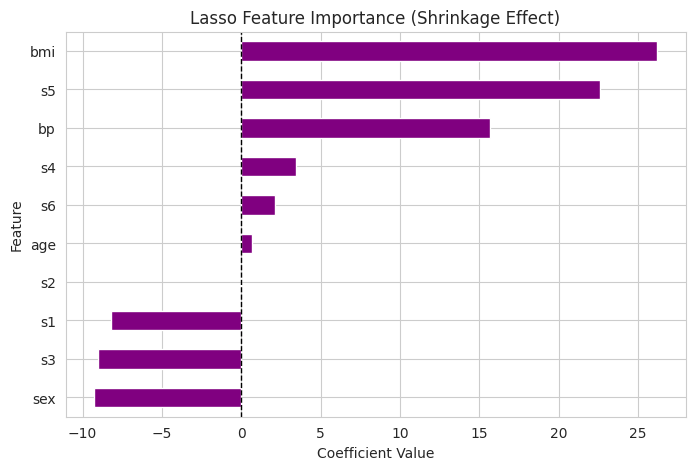

In [68]:
plt.figure(figsize=(8, 5))
feature_importance.sort_values().plot(kind="barh", color="purple")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Lasso Feature Importance (Shrinkage Effect)")
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.show()

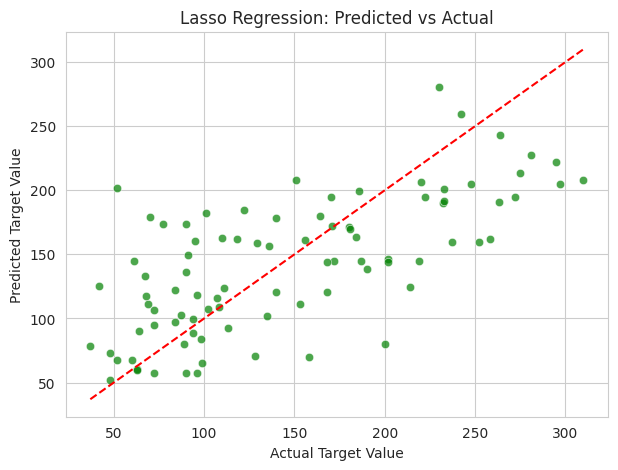

In [69]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Target Value")
plt.ylabel("Predicted Target Value")
plt.title("Lasso Regression: Predicted vs Actual")
plt.show()